In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

train_samples = 10000

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

def expand(i):
    res = [0 for _ in range(0, 10)]
    res[i] = 1 
    return res

y = [expand(int(v)) for v in y]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import src.FFNN as ffnn
from src.utils import plot_training_results

# Depth

## Model 1
Depth: 4

In [3]:

layer_size = [784, 128, 128, 128, 10]
activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]

model_depth_1 = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_depth_1 = model_depth_1.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)


Epoch 1/300, Loss: 0.9482, Val_loss: 0.8994
Epoch 2/300, Loss: 0.8992, Val_loss: 0.8990
Epoch 3/300, Loss: 0.8988, Val_loss: 0.8985
Epoch 4/300, Loss: 0.8981, Val_loss: 0.8976
Epoch 5/300, Loss: 0.8970, Val_loss: 0.8961
Epoch 6/300, Loss: 0.8949, Val_loss: 0.8933
Epoch 7/300, Loss: 0.8906, Val_loss: 0.8872
Epoch 8/300, Loss: 0.8801, Val_loss: 0.8707
Epoch 9/300, Loss: 0.8509, Val_loss: 0.8255
Epoch 10/300, Loss: 0.7873, Val_loss: 0.7479
Epoch 11/300, Loss: 0.7106, Val_loss: 0.6760
Epoch 12/300, Loss: 0.6488, Val_loss: 0.6228
Epoch 13/300, Loss: 0.6001, Val_loss: 0.5767
Epoch 14/300, Loss: 0.5552, Val_loss: 0.5354
Epoch 15/300, Loss: 0.5142, Val_loss: 0.4968
Epoch 16/300, Loss: 0.4766, Val_loss: 0.4613
Epoch 17/300, Loss: 0.4419, Val_loss: 0.4280
Epoch 18/300, Loss: 0.4122, Val_loss: 0.4027
Epoch 19/300, Loss: 0.3853, Val_loss: 0.3729
Epoch 20/300, Loss: 0.3604, Val_loss: 0.3563
Epoch 21/300, Loss: 0.3382, Val_loss: 0.3331
Epoch 22/300, Loss: 0.3203, Val_loss: 0.3132
Epoch 23/300, Loss:

In [4]:
y_pred = model_depth_1.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9494
F1-score: 0.9494

Confusion Matrix:
[[663   0   2   0   0   3   7   1   8   1]
 [  0 802   2   7   0   1   0   4   4   0]
 [  6   5 679   1   4   2   6   2  10   1]
 [  2   4  11 664   1   7   1  11  13   1]
 [  0   2   2   0 631   0   3   3   2  16]
 [  5   4   2  28   2 571   9   0   9   4]
 [  2   0   6   0   3   4 671   0   3   0]
 [  1   4   9   1   1   1   0 683   1   9]
 [  1   4   5   5   3   4   3   5 608   5]
 [  6   3   0   7  17   1   2  12   7 674]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       685
           1       0.97      0.98      0.97       820
           2       0.95      0.95      0.95       716
           3       0.93      0.93      0.93       715
           4       0.95      0.96      0.96       659
           5       0.96      0.90      0.93       634
           6       0.96      0.97      0.96       689
           7       0.95      0.96      0.95       710
     

## Model 2
Depth: 3

In [5]:

layer_size = [784, 128, 128, 10]
activations = ["sigmoid", "sigmoid", "sigmoid"]

model_depth_2 = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_depth_2 = model_depth_2.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)


Epoch 1/300, Loss: 0.9471, Val_loss: 0.8710
Epoch 2/300, Loss: 0.8344, Val_loss: 0.7922
Epoch 3/300, Loss: 0.7394, Val_loss: 0.6790
Epoch 4/300, Loss: 0.6190, Val_loss: 0.5604
Epoch 5/300, Loss: 0.5067, Val_loss: 0.4598
Epoch 6/300, Loss: 0.4161, Val_loss: 0.3780
Epoch 7/300, Loss: 0.3463, Val_loss: 0.3240
Epoch 8/300, Loss: 0.2961, Val_loss: 0.2787
Epoch 9/300, Loss: 0.2597, Val_loss: 0.2528
Epoch 10/300, Loss: 0.2349, Val_loss: 0.2234
Epoch 11/300, Loss: 0.2140, Val_loss: 0.2084
Epoch 12/300, Loss: 0.1966, Val_loss: 0.1936
Epoch 13/300, Loss: 0.1839, Val_loss: 0.1835
Epoch 14/300, Loss: 0.1774, Val_loss: 0.1783
Epoch 15/300, Loss: 0.1678, Val_loss: 0.1692
Epoch 16/300, Loss: 0.1614, Val_loss: 0.1680
Epoch 17/300, Loss: 0.1571, Val_loss: 0.1612
Epoch 18/300, Loss: 0.1517, Val_loss: 0.1547
Epoch 19/300, Loss: 0.1459, Val_loss: 0.1479
Epoch 20/300, Loss: 0.1448, Val_loss: 0.1470
Epoch 21/300, Loss: 0.1396, Val_loss: 0.1459
Epoch 22/300, Loss: 0.1369, Val_loss: 0.1422
Epoch 23/300, Loss:

In [6]:
y_pred = model_depth_2.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9616
F1-score: 0.9615

Confusion Matrix:
[[666   0   2   1   1   1   5   1   7   1]
 [  0 807   3   5   0   0   0   2   3   0]
 [  3   5 687   2   6   0   0   2   8   3]
 [  0   1   4 681   0   8   2   6  12   1]
 [  1   1   0   0 641   0   2   3   1  10]
 [  3   3   2  19   3 588   5   1   7   3]
 [  1   3   1   0   3   5 675   0   1   0]
 [  0   5   7   0   1   1   0 686   1   9]
 [  1   5   4   3   2   3   2   2 620   1]
 [  4   5   1   5  14   1   1  11   7 680]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       685
           1       0.97      0.98      0.98       820
           2       0.97      0.96      0.96       716
           3       0.95      0.95      0.95       715
           4       0.96      0.97      0.96       659
           5       0.97      0.93      0.95       634
           6       0.98      0.98      0.98       689
           7       0.96      0.97      0.96       710
     

## Model 3
Depth: 5

In [7]:

layer_size = [784, 128, 128, 128, 128, 10]
activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid"]

model_depth_3 = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_depth_3 = model_depth_3.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)


Epoch 1/300, Loss: 0.9637, Val_loss: 0.8998
Epoch 2/300, Loss: 0.8998, Val_loss: 0.8997
Epoch 3/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 4/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 5/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 6/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 7/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 8/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 9/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 10/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 11/300, Loss: 0.8996, Val_loss: 0.8996
Epoch 12/300, Loss: 0.8996, Val_loss: 0.8996
Epoch 13/300, Loss: 0.8996, Val_loss: 0.8995
Epoch 14/300, Loss: 0.8996, Val_loss: 0.8995
Epoch 15/300, Loss: 0.8996, Val_loss: 0.8995
Epoch 16/300, Loss: 0.8996, Val_loss: 0.8995
Epoch 17/300, Loss: 0.8995, Val_loss: 0.8994
Epoch 18/300, Loss: 0.8995, Val_loss: 0.8994
Epoch 19/300, Loss: 0.8995, Val_loss: 0.8993
Epoch 20/300, Loss: 0.8994, Val_loss: 0.8993
Epoch 21/300, Loss: 0.8994, Val_loss: 0.8993
Epoch 22/300, Loss: 0.8993, Val_loss: 0.8992
Epoch 23/300, Loss:

In [8]:
y_pred = model_depth_3.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9224
F1-score: 0.9223

Confusion Matrix:
[[648   0  10   1   5   6   7   3   4   1]
 [  0 793   4   3   0   1   1   3  13   2]
 [  8   4 665   6   8   1  12   4   5   3]
 [  3   0  12 644   1  19   1  10  17   8]
 [  0   2   5   0 615   1   8   1   3  24]
 [ 16   1   2  26   4 551   6   2  19   7]
 [  6   3   4   0   9   7 657   0   3   0]
 [  0   6  11   4   3   1   0 667   3  15]
 [  4   1  17  22   1  12   4   6 559  17]
 [  5   1   2   4  21   3   2  28   5 658]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       685
           1       0.98      0.97      0.97       820
           2       0.91      0.93      0.92       716
           3       0.91      0.90      0.90       715
           4       0.92      0.93      0.93       659
           5       0.92      0.87      0.89       634
           6       0.94      0.95      0.95       689
           7       0.92      0.94      0.93       710
     

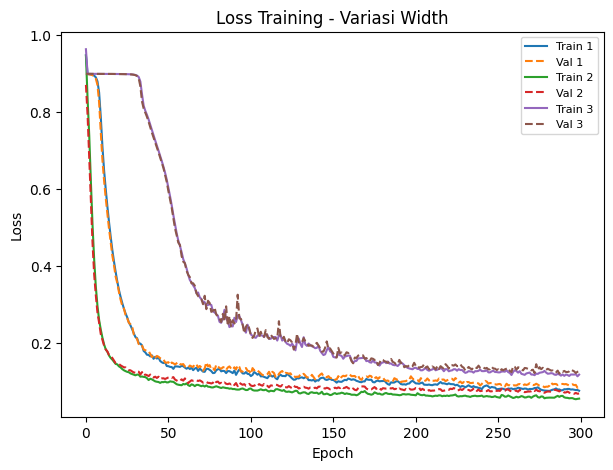

In [9]:
plot_training_results([plot_depth_1,plot_depth_2,plot_depth_3])

# Width

## Model 1
Width: 256

In [10]:

layer_size = [784, 256, 256, 256, 10]
activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]

model_width_1 = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_width_1 = model_width_1.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)


Epoch 1/300, Loss: 0.9242, Val_loss: 0.8947
Epoch 2/300, Loss: 0.8880, Val_loss: 0.8754
Epoch 3/300, Loss: 0.8339, Val_loss: 0.7952
Epoch 4/300, Loss: 0.7547, Val_loss: 0.7011
Epoch 5/300, Loss: 0.6240, Val_loss: 0.5480
Epoch 6/300, Loss: 0.4777, Val_loss: 0.4230
Epoch 7/300, Loss: 0.3733, Val_loss: 0.3376
Epoch 8/300, Loss: 0.3009, Val_loss: 0.2776
Epoch 9/300, Loss: 0.2496, Val_loss: 0.2369
Epoch 10/300, Loss: 0.2135, Val_loss: 0.2052
Epoch 11/300, Loss: 0.1879, Val_loss: 0.1881
Epoch 12/300, Loss: 0.1728, Val_loss: 0.1742
Epoch 13/300, Loss: 0.1598, Val_loss: 0.1604
Epoch 14/300, Loss: 0.1471, Val_loss: 0.1495
Epoch 15/300, Loss: 0.1408, Val_loss: 0.1426
Epoch 16/300, Loss: 0.1327, Val_loss: 0.1420
Epoch 17/300, Loss: 0.1282, Val_loss: 0.1358
Epoch 18/300, Loss: 0.1234, Val_loss: 0.1315
Epoch 19/300, Loss: 0.1201, Val_loss: 0.1254
Epoch 20/300, Loss: 0.1158, Val_loss: 0.1205
Epoch 21/300, Loss: 0.1124, Val_loss: 0.1235
Epoch 22/300, Loss: 0.1125, Val_loss: 0.1195
Epoch 23/300, Loss:

In [11]:
y_pred = model_width_1.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9550
F1-score: 0.9550

Confusion Matrix:
[[669   0   3   1   2   1   1   1   7   0]
 [  0 803   4   1   0   2   1   3   4   2]
 [  3   4 685   3   4   0   4   2   9   2]
 [  1   0   9 662   1  14   2   7  16   3]
 [  3   0   1   0 635   0   1   2   2  15]
 [  2   1   1  16   3 587  12   2   6   4]
 [  4   1   2   0   7   4 670   0   1   0]
 [  0   3   8   0   3   2   0 681   1  12]
 [  2   2   2   7   2   6   2   3 612   5]
 [  4   3   2   5  22   1   0   8   3 681]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       685
           1       0.98      0.98      0.98       820
           2       0.96      0.96      0.96       716
           3       0.95      0.93      0.94       715
           4       0.94      0.96      0.95       659
           5       0.95      0.93      0.94       634
           6       0.97      0.97      0.97       689
           7       0.96      0.96      0.96       710
     

## Model 2
Width: 64

In [12]:

layer_size = [784, 64, 64, 64, 10]
activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]

model_width_2 = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_width_2 = model_width_2.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)


Epoch 1/300, Loss: 0.9974, Val_loss: 0.9004
Epoch 2/300, Loss: 0.8999, Val_loss: 0.8997
Epoch 3/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 4/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 5/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 6/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 7/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 8/300, Loss: 0.8997, Val_loss: 0.8996
Epoch 9/300, Loss: 0.8996, Val_loss: 0.8996
Epoch 10/300, Loss: 0.8996, Val_loss: 0.8996
Epoch 11/300, Loss: 0.8996, Val_loss: 0.8995
Epoch 12/300, Loss: 0.8996, Val_loss: 0.8995
Epoch 13/300, Loss: 0.8996, Val_loss: 0.8995
Epoch 14/300, Loss: 0.8995, Val_loss: 0.8995
Epoch 15/300, Loss: 0.8995, Val_loss: 0.8994
Epoch 16/300, Loss: 0.8994, Val_loss: 0.8993
Epoch 17/300, Loss: 0.8994, Val_loss: 0.8993
Epoch 18/300, Loss: 0.8993, Val_loss: 0.8992
Epoch 19/300, Loss: 0.8992, Val_loss: 0.8991
Epoch 20/300, Loss: 0.8990, Val_loss: 0.8989
Epoch 21/300, Loss: 0.8988, Val_loss: 0.8987
Epoch 22/300, Loss: 0.8986, Val_loss: 0.8984
Epoch 23/300, Loss:

In [13]:
y_pred = model_width_2.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9317
F1-score: 0.9316

Confusion Matrix:
[[662   0   4   0   2   8   5   0   3   1]
 [  0 802   4   1   0   5   0   1   6   1]
 [  8   5 660   2   8   1  14   5  11   2]
 [  2   2   5 659   2  23   3  11   7   1]
 [  2   0   2   1 610   0   7   3   5  29]
 [ 10   5   1  22   4 563   8   3  16   2]
 [  6   0   4   0   6   4 663   0   6   0]
 [  0   6   9   6   1   2   0 668   2  16]
 [  1   4   8  33   5   7   1   2 575   7]
 [  5   6   1   7  21   4   2  15   8 660]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       685
           1       0.97      0.98      0.97       820
           2       0.95      0.92      0.93       716
           3       0.90      0.92      0.91       715
           4       0.93      0.93      0.93       659
           5       0.91      0.89      0.90       634
           6       0.94      0.96      0.95       689
           7       0.94      0.94      0.94       710
     

## Model 3
Width: 32

In [14]:

layer_size = [784, 32, 32, 32, 10]
activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]

model_width_3 = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot_width_3 = model_width_3.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)


Epoch 1/300, Loss: 1.1150, Val_loss: 0.9070
Epoch 2/300, Loss: 0.9021, Val_loss: 0.9002
Epoch 3/300, Loss: 0.8999, Val_loss: 0.8998
Epoch 4/300, Loss: 0.8998, Val_loss: 0.8997
Epoch 5/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 6/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 7/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 8/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 9/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 10/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 11/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 12/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 13/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 14/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 15/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 16/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 17/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 18/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 19/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 20/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 21/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 22/300, Loss: 0.8997, Val_loss: 0.8997
Epoch 23/300, Loss:

In [15]:
y_pred = model_width_3.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.8981
F1-score: 0.8983

Confusion Matrix:
[[634   0   7   0   2  21  17   0   1   3]
 [  0 794   3   4   0   5   1   3  10   0]
 [  5   6 632   6  18   3  12   6  26   2]
 [  3   1  16 644   0  29   4  10   7   1]
 [  1   0   4   1 595   3   7   1   6  41]
 [ 14   9   4  35   9 510  12   2  33   6]
 [  4   3   7   0  23   9 639   0   4   0]
 [  0   2   6   9   1   8   0 657   6  21]
 [  3   7   7  15   3  32   5   6 560   5]
 [  2   3   3   7  47  17   1  15  12 622]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       685
           1       0.96      0.97      0.97       820
           2       0.92      0.88      0.90       716
           3       0.89      0.90      0.90       715
           4       0.85      0.90      0.88       659
           5       0.80      0.80      0.80       634
           6       0.92      0.93      0.92       689
           7       0.94      0.93      0.93       710
     

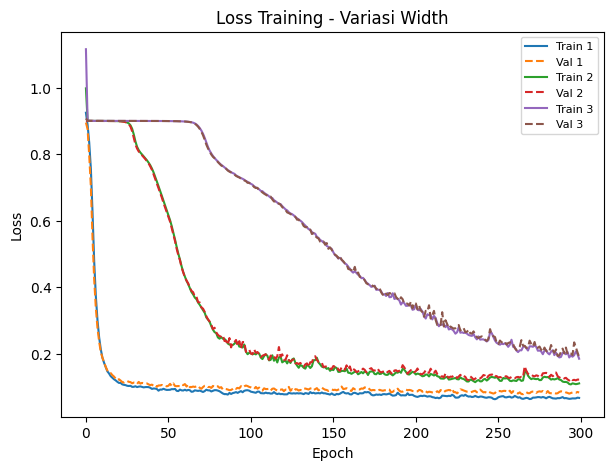

In [16]:
plot_training_results([plot_width_1,plot_width_2,plot_width_3])